# The dataset consists of 10 000 data points stored as rows with 14 features in columns

UID: unique identifier ranging from 1 to 10000
productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

uploading the dataset from kaggle

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/machine-predictive-maintenance-classification")

print("Path to dataset files:", path)

100%|██████████| 137k/137k [00:00<00:00, 27.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/machine-predictive-maintenance-classification/versions/1


showing the dataset rows

In [5]:
import pandas as pd
import os

# Define the path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/shivamb/machine-predictive-maintenance-classification/versions/1'

# List all files in the dataset directory to find the CSV file
files = os.listdir(dataset_path)
csv_file = [file for file in files if file.endswith('.csv')][0]

# Load the dataset into a DataFrame
df = pd.read_csv(os.path.join(dataset_path, csv_file))

# Display the DataFrame
(df.head())


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


different types of failure

In [6]:
unique_failure_types = df['Failure Type'].unique()
print(unique_failure_types)


['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


['بدون خرابی' 'خرابی برق' 'عیب سایش ابزار' 'شکست بیش از حد فشار'
 'شکست های تصادفی' 'شکست اتلاف حرارت']

In [7]:
df.set_index('UDI', inplace=True)
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure


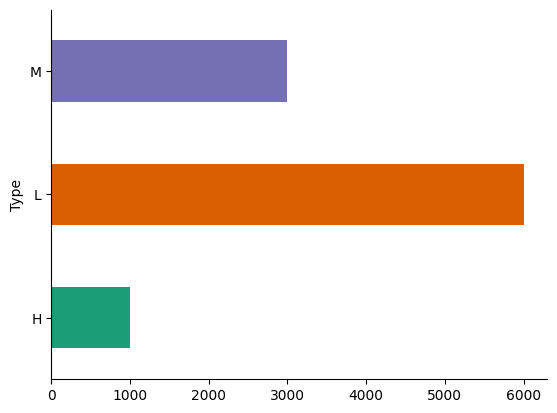

In [15]:
# @title Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

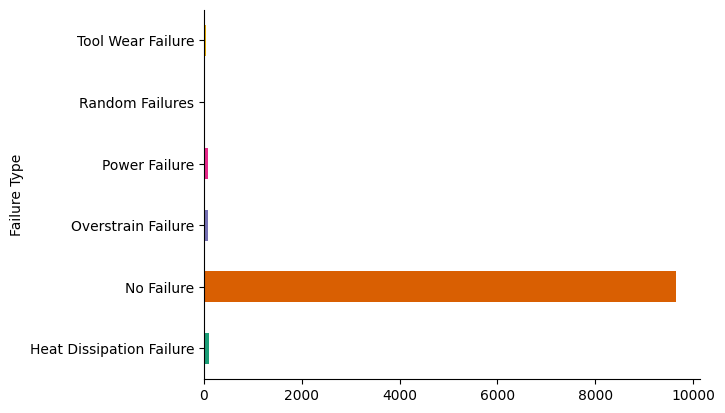

In [14]:
# @title Failure Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Failure Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

our data is imbalanced

# **droping the target column to prevent data leakage**
(Direct Information Transfer: The target column used as a feature may contain direct information about the other target column. This means the model could learn patterns that are not generalizable to new, unseen data, as it is essentially “cheating” by using information it shouldn’t have access to during prediction.

Overfitting: The model might overfit to the training data by capturing noise or specific patterns that are only present because of the direct relationship between the two target columns. This results in a model that performs well on the training data but poorly on new data.

Misleading Performance Metrics: If one target column is used as a feature, the model’s performance metrics (like accuracy, precision, recall) might be misleadingly high, as the model is evaluated on data it has already seen in a different form.

)



In [8]:
df = df.drop(columns=['Target'])

df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
UDI,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
9998,M24857,M,299.0,308.6,1645,33.4,22,No Failure


using LOF to find and replace outliers with Nan

In [9]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Specify the columns to check for outliers
columns_to_check = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

# Apply LOF to the specified columns
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = lof.fit_predict(df[columns_to_check])

# Identify the outliers and replace them with NaN
outlier_indices = df[outliers == -1].index
df.loc[outlier_indices, columns_to_check] = np.nan

print("Data with outliers replaced by NaN:")
(df)


Data with outliers replaced by NaN:


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
UDI,,,,,,,,
1,M14860,M,298.1,308.6,1551.0,42.8,0.0,No Failure
2,L47181,L,298.2,308.7,1408.0,46.3,3.0,No Failure
3,L47182,L,NaN,NaN,NaN,NaN,NaN,No Failure
4,L47183,L,298.2,308.6,1433.0,39.5,7.0,No Failure
5,L47184,L,298.2,308.7,1408.0,40.0,9.0,No Failure
...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604.0,29.5,14.0,No Failure
9997,H39410,H,298.9,308.4,1632.0,31.8,17.0,No Failure
9998,M24857,M,299.0,308.6,1645.0,33.4,22.0,No Failure


missing values

In [10]:
import pandas as pd

# Assuming df is your DataFrame
missing_values_count = df.isnull().sum()

print("Missing values for each feature:")
print(missing_values_count)


Missing values for each feature:
Product ID                    0
Type                          0
Air temperature [K]        1000
Process temperature [K]    1000
Rotational speed [rpm]     1000
Torque [Nm]                1000
Tool wear [min]            1000
Failure Type                  0
dtype: int64


data Imputation using MICE

In [11]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming df is your DataFrame with missing values
# Specify the columns you want to impute
columns_to_impute = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

print("Data after MICE imputation:")
(df)


Data after MICE imputation:


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
UDI,,,,,,,,
1,M14860,M,298.1000,308.600000,1551.000000,42.800000,0.000000,No Failure
2,L47181,L,298.2000,308.700000,1408.000000,46.300000,3.000000,No Failure
3,L47182,L,300.0011,310.005622,1541.640333,39.413789,106.421556,No Failure
4,L47183,L,298.2000,308.600000,1433.000000,39.500000,7.000000,No Failure
5,L47184,L,298.2000,308.700000,1408.000000,40.000000,9.000000,No Failure
...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8000,308.400000,1604.000000,29.500000,14.000000,No Failure
9997,H39410,H,298.9000,308.400000,1632.000000,31.800000,17.000000,No Failure
9998,M24857,M,299.0000,308.600000,1645.000000,33.400000,22.000000,No Failure


In [12]:
import pandas as pd

# Assuming df is your DataFrame
missing_values_count = df.isnull().sum()

print("Missing values for each feature:")
print(missing_values_count)

Missing values for each feature:
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
dtype: int64


Duplicate data

In [13]:
# Check for duplicates
duplicates = df.duplicated()

print("Duplicate rows:")
print(df[duplicates])

# Remove duplicates
df = df.drop_duplicates()

print("Data after removing duplicates:")
(df)


Duplicate rows:
Empty DataFrame
Columns: [Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Failure Type]
Index: []
Data after removing duplicates:


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
UDI,,,,,,,,
1,M14860,M,298.1000,308.600000,1551.000000,42.800000,0.000000,No Failure
2,L47181,L,298.2000,308.700000,1408.000000,46.300000,3.000000,No Failure
3,L47182,L,300.0011,310.005622,1541.640333,39.413789,106.421556,No Failure
4,L47183,L,298.2000,308.600000,1433.000000,39.500000,7.000000,No Failure
5,L47184,L,298.2000,308.700000,1408.000000,40.000000,9.000000,No Failure
...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8000,308.400000,1604.000000,29.500000,14.000000,No Failure
9997,H39410,H,298.9000,308.400000,1632.000000,31.800000,17.000000,No Failure
9998,M24857,M,299.0000,308.600000,1645.000000,33.400000,22.000000,No Failure


encoding using label encoding

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each column
df['Product ID'] = label_encoder.fit_transform(df['Product ID'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

(df)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
UDI,,,,,,,,
1,7003,2,298.1000,308.600000,1551.000000,42.800000,0.000000,1
2,1003,1,298.2000,308.700000,1408.000000,46.300000,3.000000,1
3,1004,1,300.0011,310.005622,1541.640333,39.413789,106.421556,1
4,1005,1,298.2000,308.600000,1433.000000,39.500000,7.000000,1
5,1006,1,298.2000,308.700000,1408.000000,40.000000,9.000000,1
...,...,...,...,...,...,...,...,...
9996,9997,2,298.8000,308.400000,1604.000000,29.500000,14.000000,1
9997,1001,0,298.9000,308.400000,1632.000000,31.800000,17.000000,1
9998,9998,2,299.0000,308.600000,1645.000000,33.400000,22.000000,1


checking for correlation

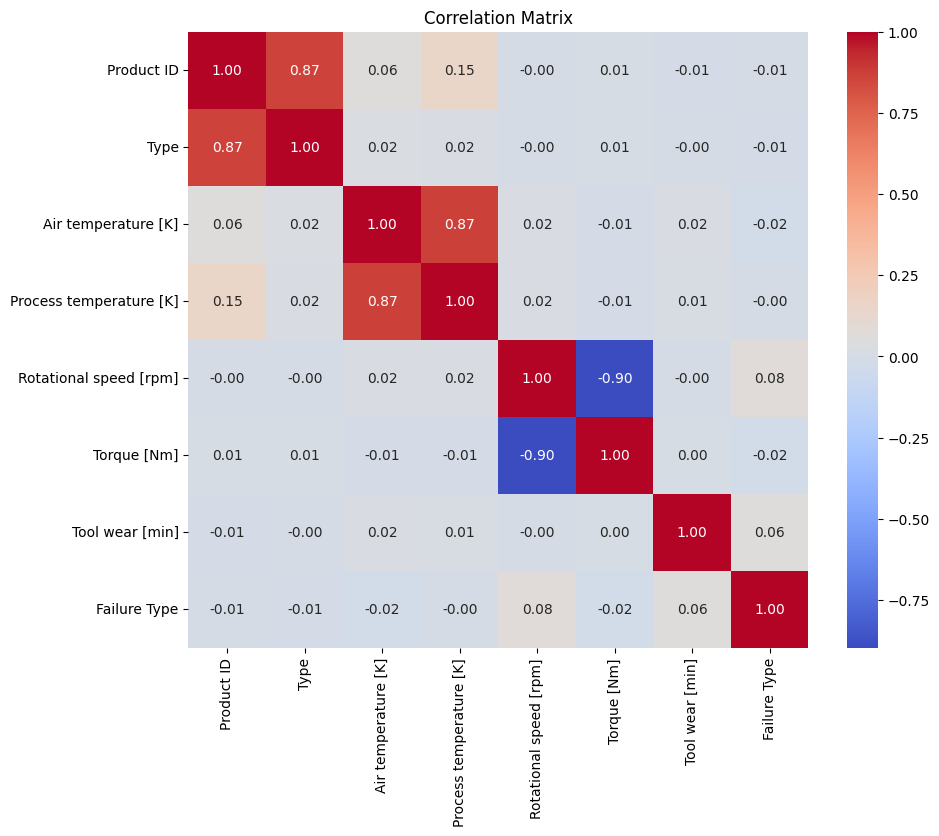

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


handling highly correlated features

In [16]:
# Create a new feature as the average of the two temperatures
df['Average Temperature'] = (df['Air temperature [K]'] + df['Process temperature [K]']) / 2

# Drop the original temperature columns
df = df.drop(columns=['Air temperature [K]', 'Process temperature [K]'])

# Create a new feature as the product of the speed and torque
df['Speed-Torque Interaction'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']

# Drop the original speed and torque columns
df = df.drop(columns=['Rotational speed [rpm]', 'Torque [Nm]'])

# Drop the "Type" column
df = df.drop(columns='Type')

(df)

,Product ID,Tool wear [min],Failure Type,Average Temperature,Speed-Torque Interaction
UDI,,,,,
1,7003,0.000000,1,303.350000,66382.800000
2,1003,3.000000,1,303.450000,65190.400000
3,1004,106.421556,1,305.003361,60761.886641
4,1005,7.000000,1,303.400000,56603.500000
5,1006,9.000000,1,303.450000,56320.000000
...,...,...,...,...,...
9996,9997,14.000000,1,303.600000,47318.000000
9997,1001,17.000000,1,303.650000,51897.600000
9998,9998,22.000000,1,303.800000,54943.000000


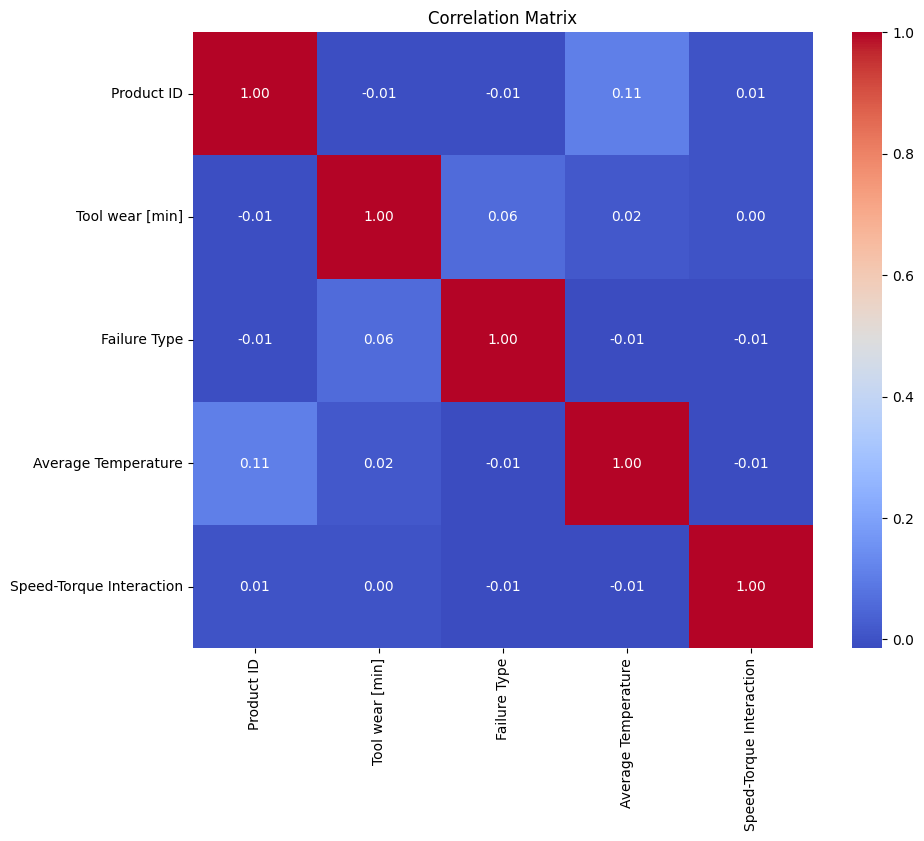

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

scaling the dataset using min-max scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale (exclude 'Failure Type')
columns_to_scale = df.columns.difference(['Failure Type'])

# Fit and transform the data only on selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

(df)

,Product ID,Tool wear [min],Failure Type,Average Temperature,Speed-Torque Interaction
UDI,,,,,
1,0.70037,0.000000,1,0.331395,0.628624
2,0.10031,0.013274,1,0.343023,0.610376
3,0.10041,0.470892,1,0.523647,0.542605
4,0.10051,0.030973,1,0.337209,0.478968
5,0.10061,0.039823,1,0.343023,0.474629
...,...,...,...,...,...
9996,0.99980,0.061947,1,0.360465,0.336868
9997,0.10011,0.075221,1,0.366279,0.406952
9998,0.99990,0.097345,1,0.383721,0.453557


Renaming the columns

In [19]:
df.columns

Index(['Product ID', 'Tool wear [min]', 'Failure Type', 'Average Temperature',
       'Speed-Torque Interaction'],
      dtype='object')

In [20]:
# Function to clean column names
def clean_column_names(columns):
  return [col.replace(' ', '_').replace('[min]', '') for col in columns]

# Apply the function to the DataFrame columns
df.columns = clean_column_names(df.columns)

print(df.columns)

Index(['Product_ID', 'Tool_wear_', 'Failure_Type', 'Average_Temperature',
       'Speed-Torque_Interaction'],
      dtype='object')


In [21]:
df

,Product_ID,Tool_wear_,Failure_Type,Average_Temperature,Speed-Torque_Interaction
UDI,,,,,
1,0.70037,0.000000,1,0.331395,0.628624
2,0.10031,0.013274,1,0.343023,0.610376
3,0.10041,0.470892,1,0.523647,0.542605
4,0.10051,0.030973,1,0.337209,0.478968
5,0.10061,0.039823,1,0.343023,0.474629
...,...,...,...,...,...
9996,0.99980,0.061947,1,0.360465,0.336868
9997,0.10011,0.075221,1,0.366279,0.406952
9998,0.99990,0.097345,1,0.383721,0.453557


# **dealing with class imbalance**

In [24]:
from collections import Counter
from imblearn.over_sampling import ADASYN

X = df.drop('Failure_Type', axis=1)
y = df['Failure_Type']

# Initial Dataset Analysis
print("Original dataset shape:")
print(Counter(y))

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Resampled Dataset Analysis
print("\nResampled dataset shape:")
print(Counter(y_resampled))

Original dataset shape:
Counter({1: 9652, 0: 112, 3: 95, 2: 78, 5: 45, 4: 18})

Resampled dataset shape:
Counter({3: 7734, 1: 7717, 5: 7716, 4: 7716, 0: 7711, 2: 7709})


In [25]:
# Combine the resampled feature set 'X_res' and the resampled target variable 'y_res' into a single DataFrame
df_new = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [26]:
df_new

,Product_ID,Tool_wear_,Average_Temperature,Speed-Torque_Interaction,Failure_Type
0,0.658166,0.862832,0.372093,0.381854,1
1,0.192419,0.606195,0.325581,0.755513,1
2,0.199620,0.858407,0.290698,0.339972,1
3,0.882288,0.030973,0.622093,0.420256,1
4,0.501450,0.920354,0.633721,0.427754,1
...,...,...,...,...,...
46298,0.839966,0.957887,0.572001,0.612422,5
46299,0.676760,0.958420,0.651302,0.552500,5
46300,0.744561,0.933832,0.505459,0.605026,5
46301,0.769092,0.966899,0.647124,0.576443,5


# **ML algorithms**

In [27]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42, stratify=y)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix ,ConfusionMatrixDisplay ,accuracy_score ,recall_score ,precision_score ,f1_score)


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def select_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

    # Define the models to evaluate
    models = [
        LogisticRegression(n_jobs=-1, max_iter=1000),  # Adding max_iter to avoid convergence issues
        SVC(kernel='rbf'),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
        XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')  # XGBoost adjustments
    ]

    # Lists to store training and testing accuracy
    acc_train = []
    acc_test = []

    # Evaluate each model
    for model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Accuracy for training and testing sets
        train_acc = round(model.score(X_train, y_train) * 100, 2)
        test_acc = round(model.score(X_test, y_test) * 100, 2)

        acc_train.append(train_acc)
        acc_test.append(test_acc)

    # Create a dictionary for the results
    dic = {
        "Model": [type(model).__name__ for model in models],
        "Train_acc": acc_train,
        "Test_acc": acc_test
    }

    # Return the results as a DataFrame
    return pd.DataFrame(dic)

In [30]:
training = select_model(X,y)
training

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:29:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Train_acc,Test_acc
0,LogisticRegression,96.53,96.50
1,SVC,96.53,96.50
2,DecisionTreeClassifier,100.00,95.10
3,RandomForestClassifier,100.00,96.05
4,XGBClassifier,98.65,96.30


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Function to calculate the distance to an ideal solution and anti-ideal solution
def topsis(df):
    df = df.copy()
    # Normalize the DataFrame
    df_norm = df / np.sqrt((df**2).sum())

    # Define the ideal and anti-ideal solutions
    ideal_solution = df_norm.max()
    anti_ideal_solution = df_norm.min()

    # Calculate the distance to the ideal and anti-ideal solutions
    distance_to_ideal = np.sqrt(((df_norm - ideal_solution)**2).sum(axis=1))
    distance_to_anti_ideal = np.sqrt(((df_norm - anti_ideal_solution)**2).sum(axis=1))

    # Calculate the TOPSIS score
    topsis_score = distance_to_anti_ideal / (distance_to_ideal + distance_to_anti_ideal)

    return topsis_score

def select_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

    # Define the models to evaluate
    models = [
        LogisticRegression(n_jobs=-1, max_iter=1000),
        SVC(kernel='rbf', probability=True),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
        XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
    ]

    # Lists to store model performance
    model_names = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Evaluate each model
    for model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Compute metrics
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store results
        model_names.append(type(model).__name__)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Create a DataFrame to store results
    results_df = pd.DataFrame({
        "Model": model_names,
        "Precision": precision_scores,
        "Recall": recall_scores,
        "F1 Score": f1_scores
    })

    # Calculate TOPSIS rankings
    results_df['TOPSIS Score'] = topsis(results_df.drop(['Model'], axis=1))
    results_df['Rank'] = results_df['TOPSIS Score'].rank(ascending=False)

    return results_df

# Example usage
# df_new = ...  # Load your dataset
# X = df_new.drop('Failure Type', axis=1)
# y = df_new['Failure Type']
# result_df = select_model(X, y)
# print(result_df)


In [32]:
training = select_model(X,y)
training

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/c

,Model,Precision,Recall,F1 Score,TOPSIS Score,Rank
0,LogisticRegression,0.931225,0.9650,0.947812,0.329741,4.5
1,SVC,0.931225,0.9650,0.947812,0.329741,4.5
2,DecisionTreeClassifier,0.950441,0.9540,0.951999,0.636267,3.0
3,RandomForestClassifier,0.947168,0.9605,0.952606,0.720667,2.0
4,XGBClassifier,0.952029,0.9630,0.954767,0.923380,1.0
